# Perceptron



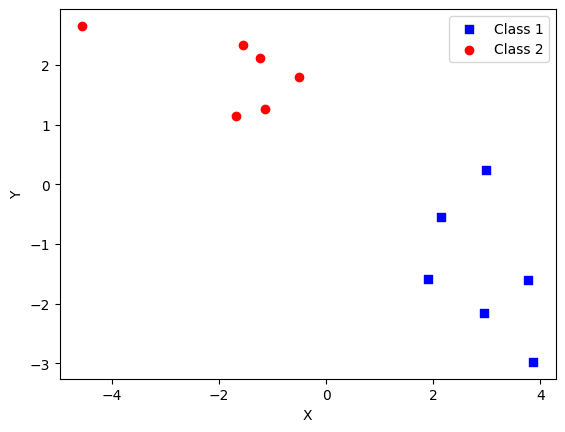

In [52]:
import numpy as np 
import numpy as np
import matplotlib.pyplot as plt

# Create the datasets
np.random.seed(0)

# Class 1
class1 = np.random.normal(loc=(2,-2),size=(6,2))

# Class 2
class2 = np.random.normal(loc=(-2,2),size=(6,2))

# Plot the datasets
plt.scatter(class1[:,0], class1[:,1], marker='s', color='blue', label='Class 1')
plt.scatter(class2[:,0], class2[:,1], marker='o', color='red', label='Class 2')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

X = np.concatenate((class1, class2), axis=0)
y= np.array([1]*6 + [0]*6)

# Show the plot
plt.show()


## Initialisation

[-1 -1] 3


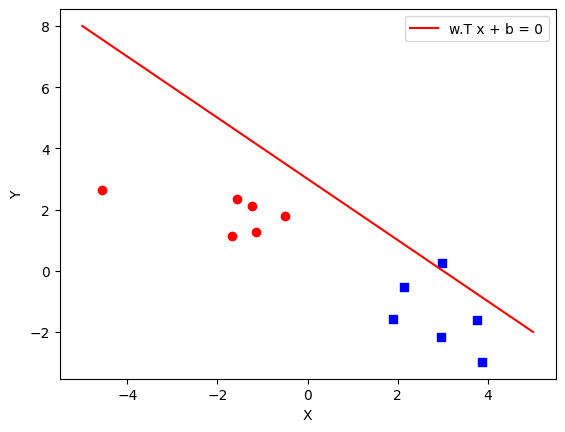

In [53]:
w = np.array([-1,-1])
b = 3
print(w,b)

import matplotlib.pyplot as plt

# Define the line equation
x = np.linspace(-5, 5, 100)
y_plot = -(w[0] * x + b) / w[1]

# Plot the line
plt.plot(x, y_plot, color='red', label='w.T x + b = 0')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Plot the datasets
plt.scatter(class1[:,0], class1[:,1], marker='s', color='blue', label='Class 1')
plt.scatter(class2[:,0], class2[:,1], marker='o', color='red', label='Class 2')
# Show the plot
plt.show()


## Learning

y_i =1, output_net = 6.33, firing = 1
y_i =1, output_net = 2.55, firing = 1
y_i =1, output_net = 9.05, firing = 1
y_i =1, output_net = 7.25, firing = 1
y_i =1, output_net = 5.93, firing = 1
y_i =1, output_net = 3.93, firing = 1
y_i =0, output_net = -1.99, firing = 0
y_i =0, output_net = -2.47, firing = 0
y_i =0, output_net = -1.20, firing = 0
y_i =0, output_net = -0.17, firing = 0
y_i =0, output_net = -3.71, firing = 0
y_i =0, output_net = -0.27, firing = 0


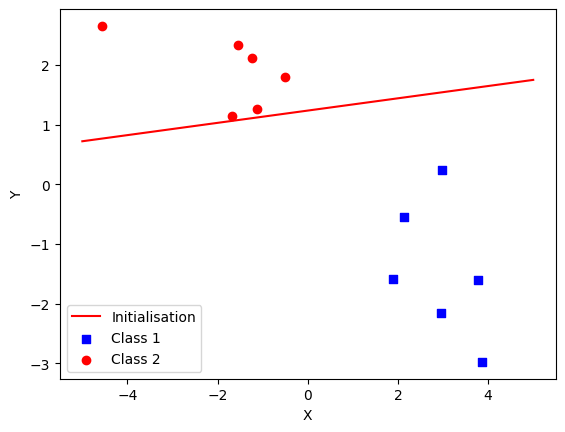

In [60]:
plt.plot(x, y_plot, color='red', label='Initialisation')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')

# Plot the datasets
plt.scatter(class1[:,0], class1[:,1], marker='s', color='blue', label='Class 1')
plt.scatter(class2[:,0], class2[:,1], marker='o', color='red', label='Class 2')

# Generate a random permutation of X and y
permuted_indices = np.random.permutation(len(X))
permuted_X = X[permuted_indices]
permuted_y = y[permuted_indices]

#Learning
nb_updates = 0
lr = .05
for i in range(len(X)):
    x_i = X[i]
    y_i = y[i]
    output_net = np.dot(w,x_i) + b
    firing = 1 if output_net > 0 else 0
    print(f"{y_i =}, {output_net = :.2f}, {firing = }")
    if y_i != firing:
        w = w + lr * (y_i - firing) * x_i
        b = b + lr * (y_i - firing)
        print(f"{w = }, {b = :.2f}")
        nb_updates += 1
        # Print the new line
        y_plot = -(w[0] * x + b) / w[1]
        plt.plot(x,y_plot,label=f"Update {nb_updates}")
plt.legend()    
plt.show()


# Perceptron (Adaline) pour la régression

Illustration du principe

## But du jeu 
Déterminer une fonction $f(x) = y$, avec $f(x)=w_0*x$

In [1]:
import numpy as np

x=np.linspace(-3,3,10)

a=-4
b=3
noise = np.random.randn(len(x))
y_vrai = np.array([xi*4 for xi in x]) + noise
y_init = np.array([xi*a for xi in x])

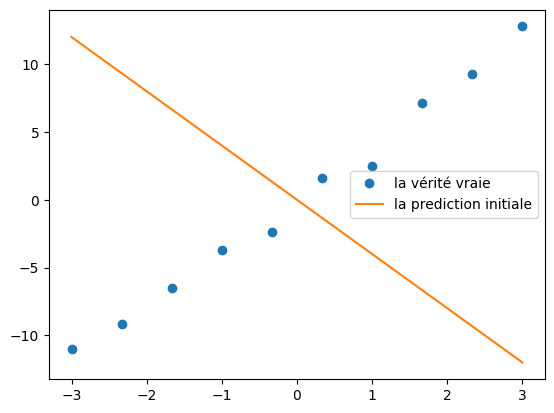

In [2]:
import matplotlib.pyplot as plt
plt.plot(x,y_vrai,'o',label = "la vérité vraie")
plt.plot(x,y_init,label = "la prediction initiale")
plt.legend()

In [3]:
#la fonction de prediction (le modele)
def f(x,a):
    return x*a

w_0 avant/apres : -4.00 → -0.55
w_0 avant/apres : -0.55 → 0.67
w_0 avant/apres : 0.67 → 1.12
w_0 avant/apres : 1.12 → 1.25
w_0 avant/apres : 1.25 → 1.28
w_0 avant/apres : 1.28 → 1.30
w_0 avant/apres : 1.30 → 1.36
w_0 avant/apres : 1.36 → 1.77
w_0 avant/apres : 1.77 → 2.37
w_0 avant/apres : 2.37 → 3.22
w_0 avant/apres : 3.22 → 3.42
w_0 avant/apres : 3.42 → 3.56
w_0 avant/apres : 3.56 → 3.61
w_0 avant/apres : 3.61 → 3.61
w_0 avant/apres : 3.61 → 3.63
w_0 avant/apres : 3.63 → 3.64
w_0 avant/apres : 3.64 → 3.58
w_0 avant/apres : 3.58 → 3.68
w_0 avant/apres : 3.68 → 3.76
w_0 avant/apres : 3.76 → 3.98
w_0 avant/apres : 3.98 → 3.84
w_0 avant/apres : 3.84 → 3.86
w_0 avant/apres : 3.86 → 3.87
w_0 avant/apres : 3.87 → 3.86
w_0 avant/apres : 3.86 → 3.88
w_0 avant/apres : 3.88 → 3.89
w_0 avant/apres : 3.89 → 3.82
w_0 avant/apres : 3.82 → 3.88
w_0 avant/apres : 3.88 → 3.91
w_0 avant/apres : 3.91 → 4.07
w_0 avant/apres : 4.07 → 3.88
w_0 avant/apres : 3.88 → 3.90
w_0 avant/apres : 3.90 → 3.90
w_0 ava

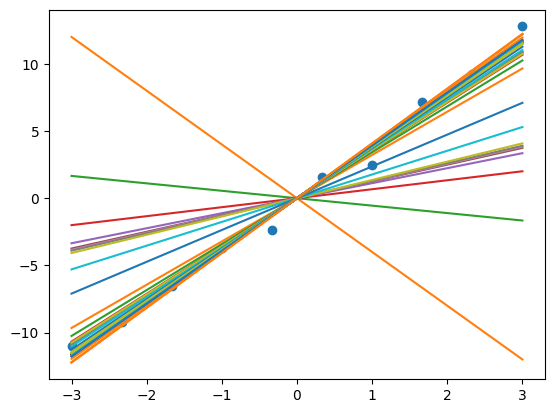

In [8]:
# on adapte w_0 pour chaque exemple un par un
plt.figure()
plt.plot(x,y_vrai,'o')
plt.plot(x,y_init)
w_0 = a # initialisation au hasard
weights = [w_0] # sauvegarde des poids 
learning_rate = 0.05 # a quel point on modifie les params 

# on parcourt chaque point
conv = False
epoch = 0
while (not conv):
    epoch += 1
    for xi,y in zip(x,y_vrai):
        pred = f(xi,w_0)
        diff = y-pred # erreur commise par le modele
        #print(f"{xi:0.2f},\t {pred =:.2f}, \t {y=:.2f} \t {diff:.2f}")
        
        w_0_new = w_0 + learning_rate*(diff)*xi #
        print(f"w_0 avant/apres : {w_0:.2f} → {w_0_new:.2f}")
        # on regarde la mise à jour et on sauvegarde
        w_0 = w_0_new
        all_pred = x*w_0
        plt.plot(x,all_pred)
        weights.append(w_0)
        #print(f"{w_0=:.2f}")
        
    if epoch == 5:
        conv = True

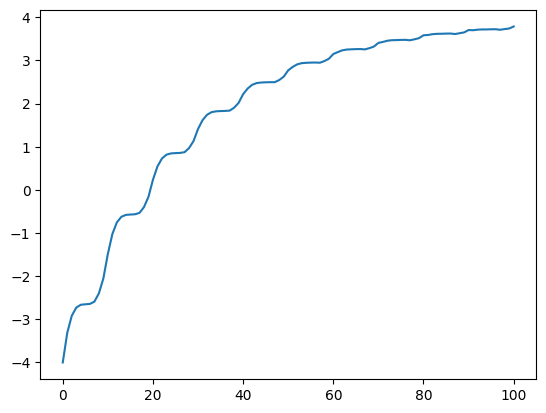

In [7]:
import matplotlib.pyplot as plt
plt.plot(weights)

In [9]:
print(w_0)

4.074845108909831


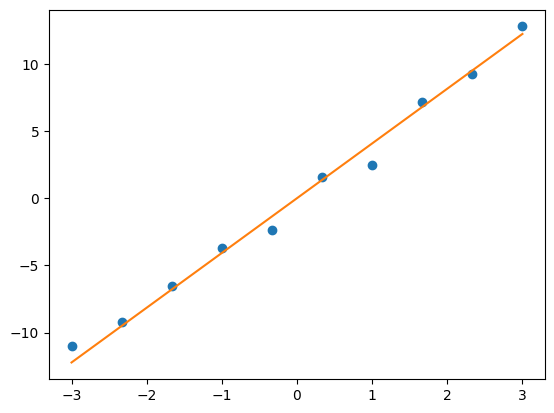

In [10]:
final_pred = f(x,w_0)
plt.plot(x,y_vrai,'o')
plt.plot(x,final_pred)